<a href="https://colab.research.google.com/github/Jen-Ocana/Fisica-Computacional-1/blob/master/Actividad_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad 7

##Bibliotecas

In [161]:
import numpy as np
import scipy.linalg as la
from numpy.linalg import matrix_power as mpow
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd

In [162]:
# Implementación del método de eliminación Gaussiana
# Definimos 3 funciones 

# Intercambio de posición de renglones.
def switch_rows(A,i,j):
    "Intercambiar renglones i y j en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E @ A

# Multiplicar un renglón por una constante no nula.
def scale_row(A,k,i):
    "Multiplicar el renglón i por k en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    E[i,i] = k
    return E @ A

# Sumar un múltiplo de un reglon a otro renglón.
def add_row(A,k,i,j):
    "Sumar k veces el renglón j al renglón i en la matriz A."
    n = A.shape[0]
    E = np.eye(n)
    if i == j:
        E[i,i] = k + 1
    else:
        E[i,j] = k
    return E @ A

In [163]:
#Par que guarde porque me molesta


##Ejercicio 1


In [164]:
A = np.array([[1,3],[-1,7]])
print(A)
B= np.array([[5,2],[1,2]])
print(B)
I= np.eye(2,dtype=int)
print(I)

[[ 1  3]
 [-1  7]]
[[5 2]
 [1 2]]
[[1 0]
 [0 1]]


Calcule el resultado de $2*I+3*A+A@B$.

In [165]:
R = 2*I+3*A+A@B
print(R)

[[13 17]
 [-1 35]]


##Ejercicio 2. 


Los polinomios característicos y el Teorema de Cayley-Hamilton.

El polinomio característico de una matriz M esta dado en general por la ecuación$$
\det(M - \lambda I) = 0
$$Para una matriz cuadrada M (2x2), el polinomio característico se puede escribir como$$
P_2 (\lambda) = \det{(M)} - \mathrm{tr \,}(M) \, \lambda + \lambda^2   
$$y para una matriz cuadrada M (3x3), el polinomio característico resulta ser

$$
P_3 (\lambda) = \frac{1}{6} 
[ \mathrm{tr}^3 (M) + 2 \, \mathrm{tr }(M^3) - 3 \, \mathrm{tr}(M) \mathrm{tr}(M^2) ] - 
\frac{1}{2} [ \mathrm{tr}^2 (M) - \mathrm{tr}(M^2) ] \lambda + \mathrm{tr}(M) \lambda^2 - \lambda^3
$$
El Teorema de Cayley-Hamilton nos dice que una matriz cuadrada M (2x2), satisface el polinomio característico$$
P_2(M) = \det(M) - \mathrm{tr}(M) M + M^2 
$$y en general cualquier matriz cuadrada M (nxn), satisface $P_n(M)$.

Demuestre esto para cualquier matriz M (2x2), ($\det(M) \neq 0$).

In [166]:
M=np.array([[-2,4],[5,7]])

Lo haremos primero por $$
\det(M - \lambda I) = 0
$$
   \begin{equation}
   Det=
        \begin{bmatrix}
        -2 & 4\\
         5 & 7
         \end{bmatrix}
          \begin{bmatrix}
          \lambda & 0\\
          0 & \lambda
          \end{bmatrix}
          =0

        \end{equation}\
        \begin{equation}
        Det=
        \begin{bmatrix}
        -2-\lambda & 4\\
        5 & 7-\lambda
        \end{bmatrix}
        \\
        Det=(-2-\lambda)(7-\lambda)-(5)(4)\\
        =(-14+2\lambda-7\lambda+\lambda^2)-20\\
        =\lambda^2-5\lambda-14-20=0\\
        =\lambda^2-5\lambda-34=0

        
        \end{equation}


P2(M)=det(M)−tr(M)M+M2

In [167]:
P2=la.det(M)*I-np.trace(M)*M+ M @ M
print(P2)

[[0. 0.]
 [0. 0.]]


##Ejercicio 3


Resuelva el sistema de ecuaciones.

$$\begin{eqnarray*}
x - 3 y + z = 1 \\ \nonumber
3 x - 4y + z  =  5 \\ \nonumber
2 y - z  =  0 \\ \nonumber
\end{eqnarray*}$$
de dos formas, utilizando el Método de Eliminación Gaussiana y la utilzando la función scipy.linalg.solve()

In [168]:
B=np.array([[1,-3,1,1],[3,-4,1,5],[0,2,-1,0]])
print(B)

[[ 1 -3  1  1]
 [ 3 -4  1  5]
 [ 0  2 -1  0]]


In [169]:
#for i in [0,2]:
#  for row in [0,1]:
#    if M[row+1,i]>0 or  M[row+1,i]<0:
#      add_row(B,(M[row,i]/M[i,i]),row+1,i)
#Print(B)

In [170]:
B1=add_row(B,-1*(B[1,0]/(B[0,0])),1,0)
print(B1)
#Sigue la segunda columna
print()
B2=scale_row(B1,1/5,1)
B2=add_row(B2,3,0,1)


B2=add_row(B2,-1*(B2[2,1]/(B2[1,1])),2,1)
print(B2)

print()

#Columna 3 pivote reglon 3
B3=scale_row(B2,1/(B2[2,2]),2)
B3=add_row(B3,-1*(B3[1,2]/(B3[2,2])),1,2)
B3=add_row(B3,-1*(B3[0,2]/(B3[2,2])),0,2)
#Primero reescalamos de forma que tengamos un 1 en el reglon
#Ya que directamente parece haber problemas de redondeo
#Luego aplicamos el metodo general de dividir entre si mismo y 
#multiplicar por el -1 el reglon que se desea "eliminar"

print(B3)
Sol=B3

[[ 1. -3.  1.  1.]
 [ 0.  5. -2.  2.]
 [ 0.  2. -1.  0.]]

[[ 1.   0.  -0.2  2.2]
 [ 0.   1.  -0.4  0.4]
 [ 0.   0.  -0.2 -0.8]]

[[1. 0. 0. 3.]
 [0. 1. 0. 2.]
 [0. 0. 1. 4.]]


La solucion es entonces
$$x=3\\
y=2\\
z=4$$

Usando scipy.linalg.eig

In [171]:
U=np.array([[1,-3,1],[3,-4,1],[0,2,-1]])
b=np.array([[1],[5],[0]])

In [172]:
# Resolviendo el sistema de ecuaciones usando scipy.linalg.solve
x_sol = la.solve(U, b)
print(x_sol)

[[3.]
 [2.]
 [4.]]


##Ejercicio 4

In [173]:
A1=np.array([[2,0,0],[0,3,4],[0,4,9]])
A2=np.array([[0,1,0],[0,0,1],[1,0,0]])
A3=np.array([[2,0,0,0],[1,2,0,0],[0,1,3,0],[0,0,1,3]])
print(A1)
print()
print(A2)
print()
print(A3)

[[2 0 0]
 [0 3 4]
 [0 4 9]]

[[0 1 0]
 [0 0 1]
 [1 0 0]]

[[2 0 0 0]
 [1 2 0 0]
 [0 1 3 0]
 [0 0 1 3]]


In [174]:
# Aplicamos la biblioteca scipy.linalg.eig()
eigvals, eigvecs = la.eig(A1)
print('Eigenvalores de A1:', eigvals)
print('Eigenvectores de A1:', eigvecs)
print()

eigvals, eigvecs = la.eig(A2)
print('Eigenvalores de A2:', eigvals)
print('Eigenvectores de A2:', eigvecs)
print()

eigvals, eigvecs = la.eig(A3)
print('Eigenvalores de A3:', eigvals)
print('Eigenvectores de A3:', eigvecs)

Eigenvalores de A1: [11.+0.j  1.+0.j  2.+0.j]
Eigenvectores de A1: [[ 0.          0.          1.        ]
 [ 0.4472136   0.89442719  0.        ]
 [ 0.89442719 -0.4472136   0.        ]]

Eigenvalores de A2: [-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]
Eigenvectores de A2: [[ 0.57735027+0.j   0.57735027-0.j  -0.57735027+0.j ]
 [-0.28867513+0.5j -0.28867513-0.5j -0.57735027+0.j ]
 [-0.28867513-0.5j -0.28867513+0.5j -0.57735027+0.j ]]

Eigenvalores de A3: [3.+0.j 3.+0.j 2.+0.j 2.+0.j]
Eigenvectores de A3: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.56395025e-16]
 [ 0.00000000e+00  0.00000000e+00  5.77350269e-01 -5.77350269e-01]
 [ 0.00000000e+00  6.66133815e-16 -5.77350269e-01  5.77350269e-01]
 [ 1.00000000e+00 -1.00000000e+00  5.77350269e-01 -5.77350269e-01]]


Coinciden con wikipedia


##Ejercicio 5

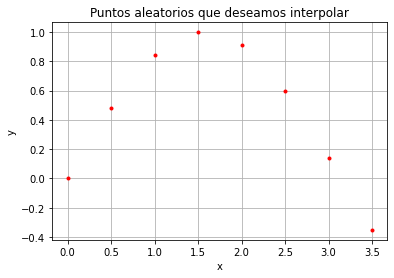

In [175]:
# Generamos los 10 puntos aleatorios entre 0 y 10.
# graficamos los puntos aleatorios en rojo con puntos ('r.')

#x = np.array([[0,0.5,1,1.5,2,2.5,3,3.5]])
x=([0,0.5,1,1.5,2,2.5,3,3.5])
#x=np.array(x).reshape(8,1)
#print(x)
#y = np.array([[0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078]])
#y=np.array(y).reshape(8,1)
y=([0,0.47942,0.84147,0.99749,0.90930,0.59847,0.14112,-0.35078])
#print(y)
plt.plot(x,y,'r.')
plt.grid()
plt.title('Puntos aleatorios que deseamos interpolar')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [176]:

X = np.vander(x,increasing=True)
print(X[:5,:5])
Sol_2=la.solve(X,y)
print(Sol_2)


[[ 1.      0.      0.      0.      0.    ]
 [ 1.      0.5     0.25    0.125   0.0625]
 [ 1.      1.      1.      1.      1.    ]
 [ 1.      1.5     2.25    3.375   5.0625]
 [ 1.      2.      4.      8.     16.    ]]
[ 0.00000000e+00  1.00067181e+00 -3.70788889e-03 -1.58867889e-01
 -8.30222222e-03  1.31964444e-02 -1.54488889e-03  2.46349206e-05]


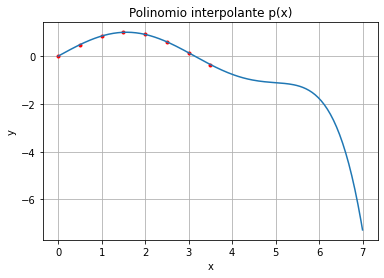

In [177]:
xs = np.linspace(0,7,200)
ys = sum([Sol_2[k]*xs**k for k in range(0,8)])
plt.plot(x,y,'r.',xs,ys)
plt.grid()
plt.title('Polinomio interpolante p(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

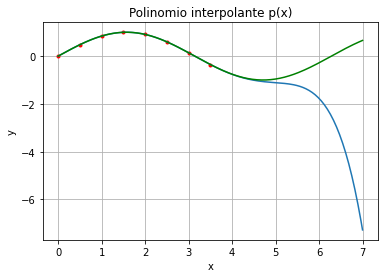

In [178]:
xs = np.linspace(0,7,200)
ys = sum([Sol_2[k]*xs**k for k in range(0,8)])
xc=np.sin(xs)
plt.plot(x,y,'r.',xs,ys)
plt.grid()
plt.plot(xs,xc,'g')
plt.title('Polinomio interpolante p(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##Actividad 6
Regrese a su modelo de análisis de series de tiempo. Haga una descomposición de su serie de tiempo de las temperaturas (Tmax y Tmin), y realice una regresión lineal sobre la serie de Tendencia de Temp $(T = a_0 + a_1 t)$. Encuentre si la pendiente es positiva o negativa de la tendencia (signo de $a_1$), es decir si las Temperaturas (Tmax, Tmin) están subiendo o bajando en el periodo analizado.

###Preparado de datos de la actividad 6


In [179]:
#En una celda concentramos todas las operaciones
#Sobre las transformaciones del dataframe original
# Preparando el dataframe df_meteo


url='https://raw.githubusercontent.com/Jen-Ocana/Fisica-Computacional-1/master/Actividad%203/8352.txt'
my_cols=['Fecha','Precip','Evap','Tmax','Tmin']
df_orig=pd.read_csv(url,names=my_cols,encoding='cp1251',sep='\s+',
                    header=None,skiprows=19,skipfooter=1,engine='python')
#definimos un data frame con los nombres de las columnas, el archivo tiene codigos ACII extendido que es el español, asi que se lo indicamos con encoding
#Se brincara los primeros 19 reglones que no tienen info y le ultimo sin encabezado
df_work0=df_orig.copy()
#Cambiamos los espacios en blanco por 'nulo' 
str_Nulo='Nulo'
df_work1=df_work0.replace(to_replace=str_Nulo,value='',regex=True)
#Convertimos los valores de las variables ambientales a num. flotantes
cols_list=['Precip','Evap','Tmax','Tmin']
for cols in cols_list:
  df_work1[cols]=pd.to_numeric(df_work1[cols],errors='coerce')
#la copia por si es necesario
df_work2=df_work1.copy()
#El primer dato es el dia
df_work2['Fecha']=pd.to_datetime(df_work2['Fecha'],dayfirst=True).copy()
#Dos columnas adicionales, una de año y otra de mes
#Usamos la funcion .dt.year y .dt.month para extraerlos de la fecha
# Usaremos la función .dt.year y .dt.strftime(%b) para extraer el Año 
# y Mes (Abreviado) de la Fecha
df_work2['Año']=df_work2['Fecha'].dt.year
df_work2['Mes']=df_work2['Fecha'].dt.strftime('%b')
##Para esta actividad definimos un nuevo dataframe para el analisis
#Para nuevo punto de partida
df_meteo = df_work2.copy()

##ELIMINEMOS LA COLUMNA DE MES NUMERICO
df_meteo.drop('Mes',axis=1,inplace=True)
df_meteo['Mes']=df_meteo['Fecha'].dt.strftime('%b')


df_meteo_ts = df_meteo.copy()

df_meteo_ts = df_meteo_ts.set_index('Fecha')

start, end ='1991-12','1997-12'
df_meteo_ts.info()

df_meteo_ts.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7907 entries, 1983-07-01 to 2007-11-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  7783 non-null   float64
 1   Evap    0 non-null      float64
 2   Tmax    7815 non-null   float64
 3   Tmin    7819 non-null   float64
 4   Año     7907 non-null   int64  
 5   Mes     7907 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 432.4+ KB


,Precip,Evap,Tmax,Tmin,Año,Mes
Fecha,,,,,,
1983-07-01,0.0,NaN,NaN,NaN,1983,Jul
1983-07-02,0.0,NaN,NaN,NaN,1983,Jul
1983-07-03,0.0,NaN,27.0,NaN,1983,Jul
1983-07-04,0.0,NaN,29.0,9.0,1983,Jul
1983-07-05,0.0,NaN,31.0,12.0,1983,Jul


In [180]:
#Funcion que convierte la fecha a decimal
from datetime import datetime as dt
import time

def toYearFraction(date):
    def sinceEpoch(date): # returns seconds since epoch
        return time.mktime(date.timetuple())
    s = sinceEpoch

    year = date.year
    startOfThisYear = dt(year=year, month=1, day=1)
    startOfNextYear = dt(year=year+1, month=1, day=1)

    yearElapsed = s(date) - s(startOfThisYear)
    yearDuration = s(startOfNextYear) - s(startOfThisYear)
    fraction = yearElapsed/yearDuration

    return date.year + fraction

In [181]:
df_tm=df_meteo
df_tm.head()
del(df_tm['Precip'],df_tm['Evap'],df_tm['Año'],df_tm['Mes'])
df_tm.head()



,Fecha,Tmax,Tmin
0,1983-07-01,NaN,NaN
1,1983-07-02,NaN,NaN
2,1983-07-03,27.0,NaN
3,1983-07-04,29.0,9.0
4,1983-07-05,31.0,12.0


In [182]:
N=len(df_tm) 

df_tm['FechaDecimal']=df_tm['Tmax']
print(df_tm)

for o in range(N): 
  
  df_tm['FechaDecimal'].iloc[o]=toYearFraction(df_tm['Fecha'].iloc[o])

del(df_tm['Fecha']) 

print(df_tm)

          Fecha  Tmax  Tmin  FechaDecimal
0    1983-07-01   NaN   NaN           NaN
1    1983-07-02   NaN   NaN           NaN
2    1983-07-03  27.0   NaN          27.0
3    1983-07-04  29.0   9.0          29.0
4    1983-07-05  31.0  12.0          31.0
...         ...   ...   ...           ...
7902 2007-11-26  26.0   3.0          26.0
7903 2007-11-27  22.0   4.0          22.0
7904 2007-11-28  20.0   4.0          20.0
7905 2007-11-29  24.0   3.0          24.0
7906 2007-11-30   NaN   3.0           NaN

[7907 rows x 4 columns]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


      Tmax  Tmin  FechaDecimal
0      NaN   NaN   1983.495890
1      NaN   NaN   1983.498630
2     27.0   NaN   1983.501370
3     29.0   9.0   1983.504110
4     31.0  12.0   1983.506849
...    ...   ...           ...
7902  26.0   3.0   2007.901370
7903  22.0   4.0   2007.904110
7904  20.0   4.0   2007.906849
7905  24.0   3.0   2007.909589
7906   NaN   3.0   2007.912329

[7907 rows x 3 columns]


In [183]:
x=df_tm['FechaDecimal']
X=np.column_stack([np.ones(N),x])
print('Shape:', X.shape)

Shape: (7907, 2)


In [189]:
df_tm.isnull().sum()
df_tm.fillna(df_tm.mean(), inplace=True)   

In [190]:
ymax=np.array(df_tm['Tmax'])
ymin=np.array(df_tm['Tmin'])

In [191]:
amax = la.solve(X.T @ X, X.T @ ymax)
amin = la.solve(X.T @ X, X.T @ ymin)
print('Para Tmax')
print(amax)
print('Para Tmin')
print(amin)

Para Tmax
[-1.01560564e+02  6.28730186e-02]
Para Tmin
[ 1.59578918e+02 -7.66773103e-02]


Tenemos ahora el $a_0$ y el $a_1$ para Tmax y para Tmin de modo que las rectas nos quedan de la forma
$$Tmax=-101.560564 + 0.0628730186 t $$
$$Tmin=159.578918 - 0.0766773103 t $$